# Chapter 3. Unsupervised Learning methods.
# Part 3. Clustering

## - k-Means Clustering

Clustering differs from classification in that it has no clue of true labels and tries to automatically find those so the only information it could get out of found clusters is that samples in it are similar to each other.

The algorithm is iterative:

1) randomly assign k given cluster centers

2) assign cluster labels to nearest samples

3) calculate centroids and shift cluster centers to them respectively

4) reassign cluster labels to nearest samples

5) repeat 2-5 untill samples would stop reassigning their labels

Applying k-Means Clustering:

Cluster affiliations: [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]

Prognostications: [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


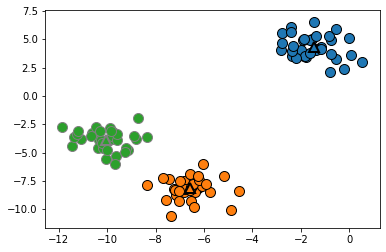

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn

#loading dataset
X, y = make_blobs(random_state=1)

#k-Means initialization and building
kmeans = KMeans(n_clusters=3).fit(X)

#calculated affiliation to clusters
#they are stored in 'labels_'
print('Cluster affiliations: {}\n'.format(kmeans.labels_))

#predicting affiliations to samples (in this case samples are...
#...the same as the train ones)
#to make prognostications, use the 'predict' method
print('Prognostications: {}'.format(kmeans.predict(X)))

#results visualization
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2], markers='^', markeredgewidth=2)

k-Means Clustering can't be apllied to datasets that can't be correctly clusterized by assigning labels to nearest cluster centers.

## k-Means as Decomposition method (vector quantization)
In compare to other decomposition methods as PCA and NMF that intended to narrow feature space, k-Means intended to expand feature space by found clusters. In some cases it lets algorithms to operate with data more accurately.

Cluster affiliations:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


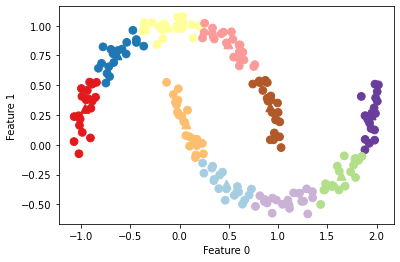

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#loading dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
#k-Means initialization and building
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

y_pred = kmeans.predict(X)

#rendering results
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster affiliations:\n{}'.format(y_pred))

^ Now 2 labels of dataset can be separated by linear model

To get even more information for feature there could be calculated distances for a sample to each cluster center (by 'transform' method):

In [7]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print('Distant features:\n{}'.format(distance_features))

(200, 10)
Distant features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## - Aglomerative Clustering

The algorithm iteratively unites 2 nearest clusters into a single and starts with every samples as their own clusters themselves. It ends when the number of clusters reaches setted 'n_clusters' value.

There are 3 methods to unite clusters:

1) 'ward' - Default. Uniting 2 clusters if their dispersion in new cluster would be minimal in compare to other pairs

2) 'average' - Uniting 2 clusters if their mean distances between samples is minimal in compare to other pairs

3) 'complete' - Uniting 2 clusters if their most distant samples have the minimalest distance in compare to other pairs

The algorithm isn't able to predict clusters for samples that wasn't in train dataset.

Text(0, 0.5, 'Feature 1')

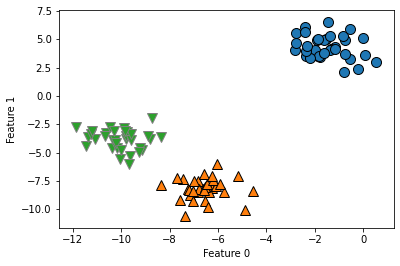

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

#loading dataset
X,y = make_blobs(random_state=1)

#algorithm initializing, building and applying
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

#rendering gain clusters
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

The algorithm requires a number of desired clusters. This number can be figured by building dendrogram of algorithm processing.

Building agglomerative clustering dendrogram:

Text(0, 0.5, 'Distances between clusters')

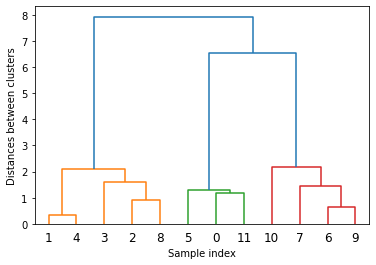

In [9]:
#sklearn doesn't have tols to build dendrogramms but...
#...those can be built by SciPy tools
from scipy.cluster.hierarchy import dendrogram, ward

#loading dataset
X, y = make_blobs(random_state=0, n_samples=12)
#applying SciPy ward clustering to get linkage array that includes...
#...similarities between clusters represented as distances
linkage_array = ward(X)
#Building dendrogram using gain linkage_array
dendrogram(linkage_array)

plt.xlabel('Sample index')
plt.ylabel('Distances between clusters')

^ As it seemed by dendrogram, the distances between 3 clusters is quite long. That's the sign that the number of clusters of 3 is right.